In [10]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style='whitegrid', font_scale=1.3)

In [4]:
two_cat_times = pd.read_csv('two_cat_times.csv')

In [5]:
two_cat_times

,operation,storage,time
0,dot,custom,0.007173
1,dot,csr,0.016044
2,dot,csc,0.025436
3,sandwich,custom,0.535435
4,sandwich,csr,1.633703
5,sandwich,csc,1.686728
6,transpose_dot,custom,0.003624
7,transpose_dot,csr,0.016109
8,transpose_dot,csc,0.019586


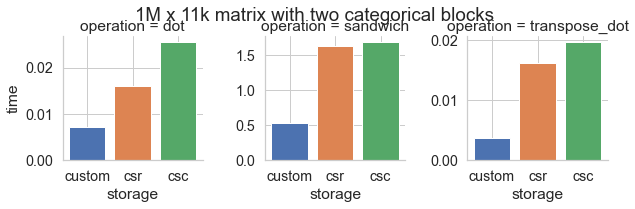

In [17]:
g = sns.FacetGrid(data=two_cat_times, col='operation', hue='storage', sharey=False)
g.map(plt.bar, 'storage', 'time')
plt.suptitle('1M x 11k matrix with two categorical blocks')
plt.savefig('two_cat_times.png')

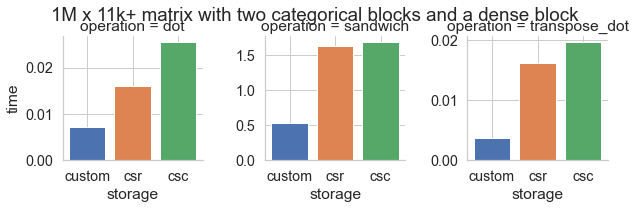

In [20]:
dense_cat_times = pd.read_csv('dense_cat_times.csv')
g = sns.FacetGrid(data=two_cat_times, col='operation', hue='storage', sharey=False)
g.map(plt.bar, 'storage', 'time')
plt.suptitle('1M x 11k+ matrix with two categorical blocks and a dense block')
plt.savefig('dense_cat_times.png')